# Amazon Sales — Exploratory Data Analysis (EDA)

Este notebook tem como objetivo explorar os dados de vendas da Amazon,
identificando padrões, tendências e comportamentos relevantes que apoiem
a análise de negócio e a construção do dashboard no Power BI.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
df = pd.read_csv('../DB/amazon_sales_data_2025.csv')
df['order_date'] = pd.to_datetime(df['order_date'])


In [3]:
df.head()
df.describe()


,order_date,price,quantity,revenue
count,250,250.00,250.00,250.00
mean,2025-04-18 05:51:21.600000,343.58,2.86,975.38
min,2025-01-03 00:00:00,15.00,1.00,15.00
25%,2025-02-24 00:00:00,40.00,2.00,100.00
50%,2025-03-19 00:00:00,150.00,3.00,400.00
75%,2025-05-02 18:00:00,600.00,4.00,"1,500.00"
max,2025-12-03 00:00:00,"1,200.00",5.00,"6,000.00"
std,NaN,380.64,1.43,"1,252.11"


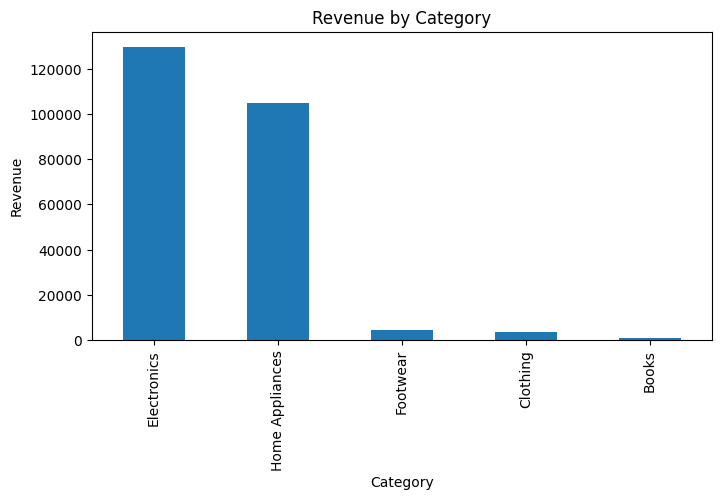

In [4]:
revenue_by_category = (
    df.groupby('category')['revenue']
      .sum()
      .sort_values(ascending=False)
)

revenue_by_category.plot(kind='bar', figsize=(8,4))
plt.title('Revenue by Category')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.show()


A análise mostra que algumas categorias concentram a maior parte da receita,
indicando dependência do desempenho desses segmentos.


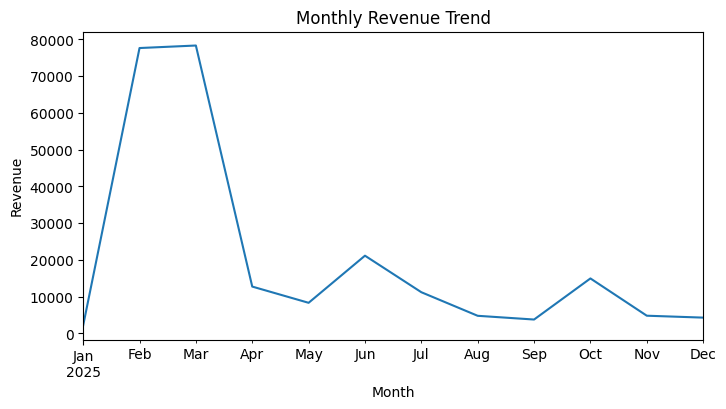

In [10]:
monthly_revenue = (
    df.set_index('order_date')
    .resample('ME')['revenue']
      .sum()
)

monthly_revenue.plot(figsize=(8,4))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()


O parâmetro de reamostragem mensal foi atualizado para 'ME' conforme recomendação do pandas.


Observa-se variação mensal na receita, permitindo identificar períodos de
maior e menor desempenho ao longo do tempo.


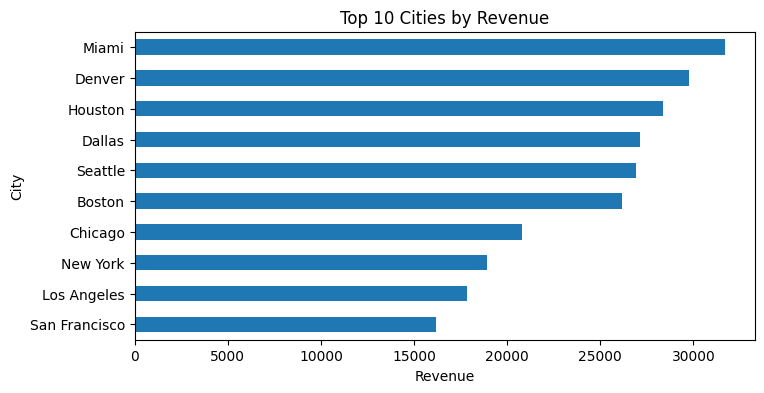

In [11]:
revenue_by_city = (
    df.groupby('customer_location')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

revenue_by_city.plot(kind='barh', figsize=(8,4))
plt.title('Top 10 Cities by Revenue')
plt.xlabel('Revenue')
plt.ylabel('City')
plt.gca().invert_yaxis()
plt.show()


A receita está concentrada em poucas cidades, sugerindo oportunidades de
foco estratégico ou expansão geográfica.


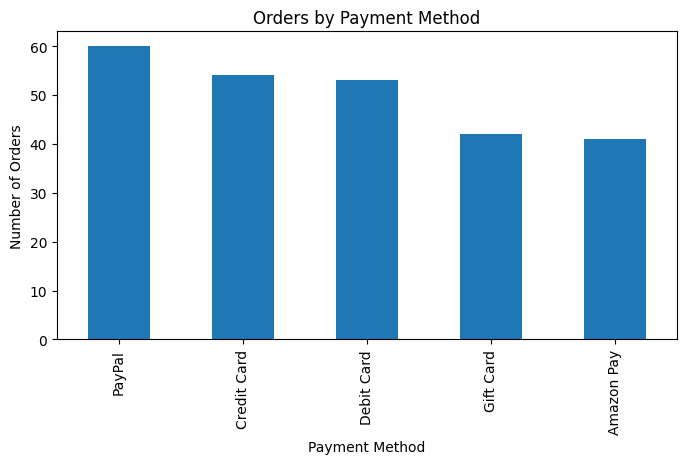

In [12]:
payment_distribution = (
    df.groupby('payment_method')['order_id']
      .count()
      .sort_values(ascending=False)
)

payment_distribution.plot(kind='bar', figsize=(8,4))
plt.title('Orders by Payment Method')
plt.ylabel('Number of Orders')
plt.xlabel('Payment Method')
plt.show()


Alguns métodos de pagamento são claramente mais utilizados,
o que pode orientar decisões sobre incentivos e parcerias financeiras.


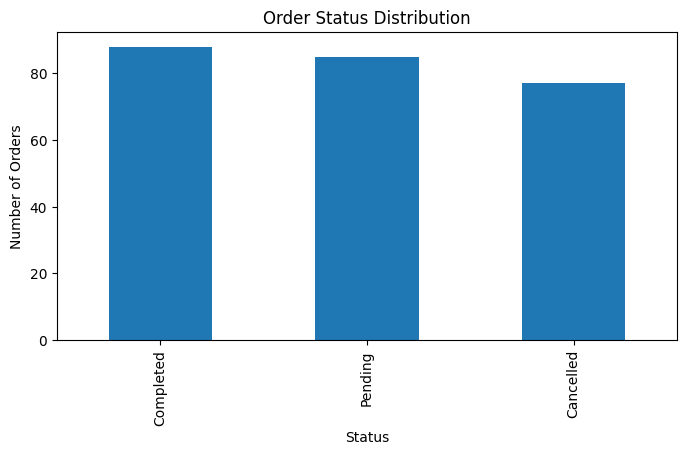

In [13]:
status_distribution = (
    df.groupby('status')['order_id']
      .count()
      .sort_values(ascending=False)
)

status_distribution.plot(kind='bar', figsize=(8,4))
plt.title('Order Status Distribution')
plt.ylabel('Number of Orders')
plt.xlabel('Status')
plt.show()


A maioria dos pedidos encontra-se em status concluído,
enquanto cancelamentos e pendências representam uma parcela menor.


## Conclusão da Análise Exploratória

A análise exploratória permitiu compreender o comportamento geral das vendas,
identificando categorias e cidades com maior contribuição de receita,
padrões temporais ao longo dos meses, preferências de métodos de pagamento
e a distribuição dos status dos pedidos.

Esses insights servem como base para a definição dos principais KPIs
e para a construção de um dashboard interativo no Power BI,
com foco em performance, tendências e apoio à tomada de decisão.
